In [38]:
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [39]:
mnist = torchvision.datasets.MNIST(root = './data', train = True, download = True)


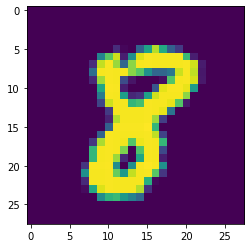

In [40]:
plt.imshow(mnist.data[16000])

In [41]:
#gpu 설정 여부
device = torch.device('cuda'if torch.cuda.is_available() else'cpu')
print(device)

cuda


In [42]:
#Hyperparameter(사람이 지정해야 하는 파라미터)
input_size = 784
hidden_size = 500
num_classes = 10 #mnist data의 분류 갯수(0~9 10개)
num_epochs = 5 
batch_size = 100
learning_rate = 0.001

In [43]:
#dataset과 dataloader
#dataset
train_dataset = torchvision.datasets.MNIST(root = './data',train=True,transform = torchvision.transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = torchvision.transforms.ToTensor())



In [48]:
#data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size, shuffle=False)

In [45]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

model = NeuralNet(input_size,hidden_size,num_classes).to(device)
        

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [76]:
#Training

loss_arr = []
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 이미지와 정답(label)을 device로 올림
    images = images.reshape(-1, 28*28).to(device) 
    labels = labels.to(device)
    # Feedforward 과정
    outputs = model(images)
    # Loss 계산
    loss = criterion(outputs, labels)
    # Backward and optimize
    optimizer.zero_grad() # iteration 마다 gradient를 0으로 초기화
    loss.backward() # 가중치 w에 대해 loss를 미분
    optimizer.step() # 가중치들을 업데이트
    if (i+1) % 100 == 0:
      loss_arr.append(loss.item())
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
      

Epoch [1/5], Step [100/600], Loss: 0.1379
tensor(0.1379, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [1/5], Step [200/600], Loss: 0.0011
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [1/5], Step [300/600], Loss: 0.0005
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [1/5], Step [400/600], Loss: 0.0002
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [1/5], Step [500/600], Loss: 0.0049
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [1/5], Step [600/600], Loss: 0.1564
tensor(0.1564, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [2/5], Step [100/600], Loss: 0.0050
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [2/5], Step [200/600], Loss: 0.0000
tensor(3.2579e-06, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [2/5], Step [300/600], Loss: 0.0000
tensor(3.4426e-06, device='cuda:0', grad_fn=<NllLossBackward0>) ㅇㅇㅇㅇㅇㅇ
Epoch [2/5]

In [77]:
loss_arr

[0.13792969286441803,
 0.0011261588661000133,
 0.0005497001693584025,
 0.00020828557899221778,
 0.00493539497256279,
 0.15635277330875397,
 0.0049646589905023575,
 3.2578950595052447e-06,
 3.4426236652507214e-06,
 0.0482051745057106,
 0.07982418686151505,
 0.0006527808145619929,
 0.0017325542867183685,
 0.0010944250971078873,
 0.00013953627785667777,
 7.085053948685527e-05,
 0.09571858495473862,
 0.017595894634723663,
 0.019355256110429764,
 0.014085156843066216,
 0.0004905482637695968,
 0.00044710596557706594,
 0.006039686966687441,
 0.06830112636089325,
 0.0006315206992439926,
 0.0008367050904780626,
 0.00012984259228687733,
 2.273342033731751e-05,
 0.005791321396827698,
 0.03692380711436272]

In [78]:
# Test 과정 : 학습한 모델의 성능을 확인하는 과정
# accuracy 계산
# 이 과정에서는 gradient를 계산할 필요가 없음!
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 10000 test images: {} %'
  .format(100 * correct / total))



Accuracy of the network on the 10000 test images: 97.96 %


In [79]:
apap = [1,2,3,4]
print(type(apap))
print(type(loss_arr))

<class 'list'>
<class 'list'>


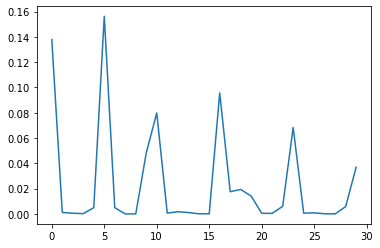

In [82]:
# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

plt.plot(loss_arr)
#plt.show()